# Networkx Package

# 1. Some Basics

My Graph
[1, 2, 3, 4, 5]
[(1, 2), (2, 3), (2, 5), (3, 4)]
5
4
[1, 3, 5]
{1: {}, 3: {}, 5: {}}
3


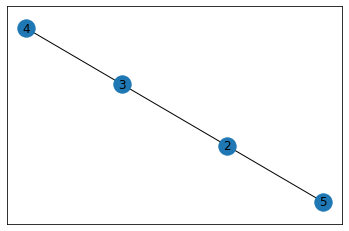

In [59]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.name='My Graph'

G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_nodes_from([4, 5])

G.add_edge(1, 2)
G.add_edges_from([(2, 3), (4, 3),(5,2)])


#nx.draw_networkx(G) #nx.draw(G)

# Graph Information 
#print(nx.info(G))
print(G.name)
print(list(G.nodes))
print(list(G.edges))
print(G.number_of_nodes())
print(G.number_of_edges())

# Node Information
n=2
print(list(G.adj[n]))
print(G[n])
print(G.degree[n])

# Remove
G.remove_node(1)
#G.remove_nodes_from([(5,2),(3,4)])
#G.remove_edge((2,3))
#G.remove_edges_from([('spam','p'),('a','spap'),('a','m')])
nx.draw_networkx(G) #nx.draw(G)


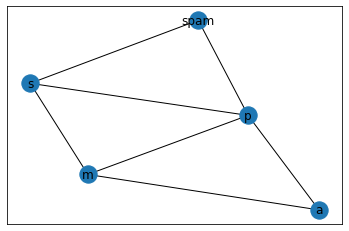

In [39]:
H = nx.Graph()
H.add_node("spam")        # adds node "spam"
H.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'

H.add_edge('s', 'spam')
H.add_edge('p', 'spam')
H.add_edges_from([('m','p'),('a','p'),('a','m'),('s','m'),('s','p')])




nx.draw_networkx(H)
#H.clear()

## Generate famous graphs

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


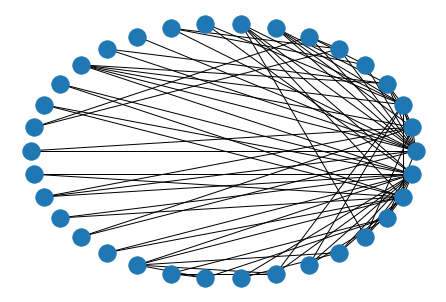

In [68]:
#Zachary’s karate club graph
kn=nx.karate_club_graph()
#nx.draw_networkx(kn)
nx.draw_circular(kn)
print(nx.info(kn))

In [ ]:
# Hexagonal structure 

Name: 
Type: Graph
Number of nodes: 240
Number of edges: 339
Average degree:   2.8250


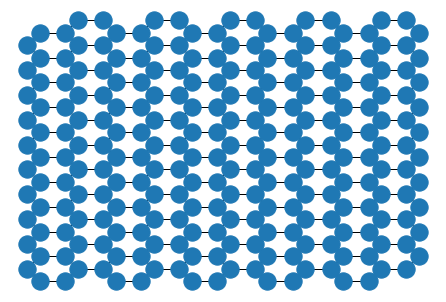

In [70]:
Ghex=nx.hexagonal_lattice_graph(10,10)
pos = nx.get_node_attributes(Ghex, 'pos')
nx.draw(Ghex,pos)
print(nx.info(Ghex))

# 2 Social Network Analysis with Python

See this article [HERE](https://www.kirenz.com/post/2019-08-13-network_analysis)<br>

You can find a short course on Network Click [HERE](https://www.youtube.com/watch?v=5Hw1OmWOLA8&list=PLnMaaCilahfY6aBe6UFJJsZ_xvYscPJiW)


## 2.1 Social Network Basics

### 2.1.1 Symmetric Networks (undirected)
The first network that we create is a group of people who work together. 
This is called a `symmetric network` because the relationship “working together” is a symmetric relationship: 
* If A is related to B, B is also related to A.

In [112]:
G_symmetric = nx.Graph()

G_symmetric.add_edge('Steven',  'Laura')
G_symmetric.add_edge('Steven',  'Marc')
G_symmetric.add_edge('Steven',  'John')
G_symmetric.add_edge('Steven',  'Michelle')
G_symmetric.add_edge('Laura',   'Michelle')
G_symmetric.add_edge('Michelle','Marc')
G_symmetric.add_edge('George',  'John')
G_symmetric.add_edge('George',  'Steven')

### 2.1.2 Asymmetric Networks (directed)
What if the relationship between nodes is ‘child of’, then the relationship is no longer symmetric. This is the case if someone follows someone else on Twitter. Or in the case of hyperlinks.

`Asymmetric network:` 
A network where the relationship is asymmetric (A is related to(child of) B, but B is not necessarily) is called an .

We can build the asymmetric network in NetworkX using `DiGraph method`, which is short of Directional Graph.

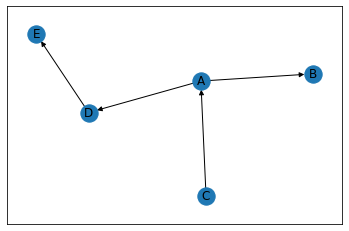

In [110]:
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')

nx.spring_layout(G_asymmetric)
nx.draw_networkx(G_asymmetric)


### 2.1.3 Weighted Networks
Till now we had networks without weights, but it is possible that networks are made with weights, 
for example, 
if in our initial network we consider `the number of projects done together as a weight`, we will get a weighted Network.

Let us make one again of the employees, but this time we add weight to the network, each edge has a weight signifying the number of projects they have done together.

In [86]:
G_weighted = nx.Graph()

G_weighted.add_edge('Steven',  'Laura',   weight=25)
G_weighted.add_edge('Steven',  'Marc',    weight=8)
G_weighted.add_edge('Steven',  'John',    weight=11)
G_weighted.add_edge('Steven',  'Michelle',weight=1)
G_weighted.add_edge('Laura',   'Michelle',weight=1)
G_weighted.add_edge('Michelle','Marc',    weight=1)
G_weighted.add_edge('George',  'John',    weight=8)
G_weighted.add_edge('George',  'Steven',  weight=4)

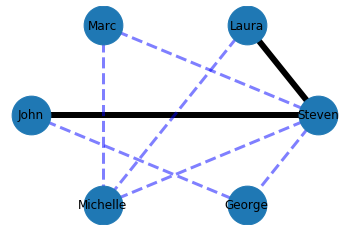

In [87]:
elarge = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] > 8]
esmall = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] <= 8]

pos = nx.circular_layout(G_weighted)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G_weighted, pos, node_size=1500)

# edges
nx.draw_networkx_edges(G_weighted, pos, edgelist=elarge,width=6)
nx.draw_networkx_edges(G_weighted, pos, edgelist=esmall,width=3, 
                       alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G_weighted, pos, font_size=12, font_family='sans-serif')

plt.axis('off')
plt.show();

## 2.2 Clustering Coefficient
https://www.youtube.com/watch?v=K2WF4pT5pFY

In [95]:
nx.clustering(G_weighted)
#nx.clustering(G_weighted,'Michelle')

0.6666666666666666

## 2.3 Network Distance Measures

### Degree

In [91]:
nx.degree(G_weighted)

DegreeView({'Steven': 5, 'Laura': 2, 'Marc': 2, 'John': 2, 'Michelle': 3, 'George': 2})

### Distance

In [99]:
print(nx.shortest_path(G_weighted, 'Michelle', 'John'))
print(nx.shortest_path_length(G_weighted, 'Michelle', 'John'))


['Michelle', 'Steven', 'John']
2


## 2.4 Network Centrality Measures

### Degree Centrality

https://www.youtube.com/watch?v=iiVeQkIELyc

In [90]:
nx.degree_centrality(G_weighted)

{'Steven': 1.0,
 'Laura': 0.4,
 'Marc': 0.4,
 'John': 0.4,
 'Michelle': 0.6000000000000001,
 'George': 0.4}

### Eigenvector Centrality
Google’s Pagerank algorithm is a type of eigenvector centrality algorithm.

* https://www.youtube.com/watch?v=IIBOT3SjJZE
* https://matrixcalc.org/en/


In [106]:
nx.eigenvector_centrality(G_weighted)

{'Steven': 0.6006686104947806,
 'Laura': 0.3545677660798074,
 'Marc': 0.3545677660798074,
 'John': 0.30844592433424667,
 'Michelle': 0.4443904166426225,
 'George': 0.30844592433424667}

In [118]:
L=nx.laplacian_matrix(G_symmetric)
print(L)

  (0, 0)	5
  (0, 1)	-1
  (0, 2)	-1
  (0, 3)	-1
  (0, 4)	-1
  (0, 5)	-1
  (1, 0)	-1
  (1, 1)	2
  (1, 4)	-1
  (2, 0)	-1
  (2, 2)	2
  (2, 4)	-1
  (3, 0)	-1
  (3, 3)	2
  (3, 5)	-1
  (4, 0)	-1
  (4, 1)	-1
  (4, 2)	-1
  (4, 4)	3
  (5, 0)	-1
  (5, 3)	-1
  (5, 5)	2


## Fiedler vector
The Fiedler vector, namely `the eigenvector corresponding to the second smallest eigenvalue of the Laplacian of a graph`, plays a vital role in many applications, including matrix reordering, graph partitioning, protein analysis and data mining, machine learning, and web search. [see here](https://www.sciencedirect.com/science/article/pii/S0377042714001587)

In [115]:
nx.fiedler_vector(G_symmetric)

array([ 0.        ,  0.36514833,  0.36514841, -0.54772256,  0.36514837,
       -0.54772256])

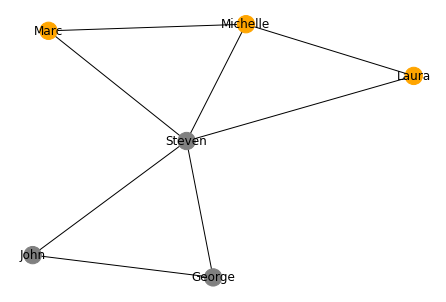

In [114]:
vf=nx.fiedler_vector(G_symmetric)
layout = nx.spring_layout(G_symmetric, pos=nx.circular_layout(G_symmetric))
colors = ['orange' if eigv > 0 else 'gray' for eigv in vf]
nx.draw(G_symmetric, pos=layout, with_labels=True, node_color=colors)